> ### EEE3314: Introduction to Artificial Intelligence

# Assignment \# I: Linear Regression

### *Assignement Instructions:*
- **Due date**: 11 PM, Sep. 24 (Fri), 2021
- **File name**: [ID_Name_HW1.ipynb]
- Write a program implementing a particular algorithm to solve a given problem.   
- **Report and discuss your results. Analyze the algorithm, theoretically and empirically.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.**
>We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by yourself so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework
- Signiture: <span style="color:blue">[2017142047] [한민규]</span>

In [ ]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-09-21 14:34:46.901333


In [1]:
%load_ext autoreload
%autoreload 2

## Problem statement

Let's estimate a house price with 506 training samples in $\texttt{boston_house_prices.csv}$. Each sample consists of a tuple of features and a corresponding house price, where the number of features are 13.  


Detailed descriptions of features in the training dataset are as follows: 



* **CRIM**     :per capita crime rate by town
* **ZN**       :proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**    :proportion of non-retail business acres per town
* **CHAS**     :Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**      :nitric oxides concentration (parts per 10 million)
* **RM**       :average number of rooms per dwelling
* **AGE**      :proportion of owner-occupied units built prior to 1940
* **DIS**      :weighted distances to five Boston employment centres
* **RAD**      :index of accessibility to radial highways
* **TAX**      :full-value property-tax rate per $\$$10,000
* **PTRATIO**  :pupil-teacher ratio by town
* **B**        :1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**    :$\%$ lower status of the population


The target price value we'd like to estimate is as follows: 

* **MEDV** :Median value of owner-occupied homes in $\$$1000's

**Note #1**:
You can use ```linalg.inv```, ```transpose```, ```dot```, ```concatenate```, ```min``` and ```max``` provided by ```Numpy```. Other mehtods (e.g., ```sklearn.linear_model``` or equivalent) should not be used. You will get no credit otherwise. 

**Note #2**: We apply the min-max normalization technique for each feature in the dataset. Please ckeck the provided function (`normalize(self)`). For eaxmple, the nomrlization for the **CRIM** feature is computed as follows:


\begin{equation}
    x[i]^\prime = \frac{x[i] - min(x[:])}{max(x[:]) - min(x[:])}
\end{equation}
where $x[i]$ is the **CRIM** fearue in the $i$th sample in the dataset. $x[i]^\prime$ is a corresponding normalized feature.

**Why is the normalized technique helpful for regression?**

### P1. Linear regression using gradient descent

P1.1 Implement a linear regression method using **gradient descent** and estimate regression coefficients for features including a bias (intercept) term. (*50 points*) 

> **Convergence condition**: Stop the iteration if $||\hat w_t - \hat w_{t+1}||_\infty < \tau$, where $\hat w_t$  is estimated coefficients at time $t$. $t$ is a number of iteration, and $\tau (=10^{-6})$ is a tolerance. Note that the infinity norm of a vector ${\bf{x}}=(x_1,x_2,\dots,x_n)$ is defined as $||{\bf{x}}||_\infty = max(|x_1|,|x_2|,\dots,|x_n|)$.
>
> **Loss function**: Average RSS (i.e., RSS/$N$, where $N$ is a total number of samples).
>
> **Initialization**: All weight values to 0 and a bias (intercept) to 1.

P1.2 Plot an average RSS loss over the number of iterations. (*3 points*) 


P1.3 Predict the target value (`MEDV`) for a given test sample (`test_samples`). Note that 1) you first normalize each feature in the test sample using minimum and maximum values for the same feature, computed from the training dataset ($\texttt{boston_house_prices.csv}$), and then 2) denormalize the prediction in a similar manner. **Why does we apply normalization (with the values computed from the training dataset) and demormalization?** (*7 points*)



### P2. Linear regression without iterations

Implement a linear regression method without iterations (**closed-form solution**) and estimate regression coefficients for features including a bias (intercept) term. (*10 points*)

### P3. Visualize the results

Draw regression lines for individual features using estimated regression coefficients obtained from P1 and P2. (*10points*) 

from google.colab import drive
drive.mount('/content/drive')

## Results

In [6]:
import numpy as np

from project1 import (Dataset,
                      LinearRegressor,
                      LR_with_closed_form,
                      visualize)

### Instantiate the ```Dataset``` class

In [7]:
data_path = 'boston_house_prices.csv'
dataset = Dataset(data_path) 

features = dataset.features 

      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


### Prepare training samples

In [8]:
X, y = dataset.parse_data(features=dataset.features)
print(f"shape of X: {X.shape}, shape of y: {y.shape}")

shape of X: (506, 14), shape of y: (506,)


In [ ]:
X[3,:]

array([1.00000000e+00, 2.92795719e-04, 0.00000000e+00, 6.30498534e-02,
       0.00000000e+00, 1.50205761e-01, 6.58555279e-01, 4.41812564e-01,
       4.48544590e-01, 8.69565217e-02, 6.67938931e-02, 6.48936170e-01,
       9.94276060e-01, 3.33885210e-02])

In [ ]:
dataset.max

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ,  50.    ])

### Instantiate a linear regression model

In [ ]:
model = LinearRegressor(lr=0.1, tau=1e-6, dim=X.shape[1])

### P1.1

In [ ]:
model.LR_with_gradient_descent(X, y)
print(model.weight)

[ 0.48057585 -0.21355808  0.10316895  0.01244984  0.05970523 -0.19191235
  0.44175883  0.00149636 -0.36065726  0.15643729 -0.14363439 -0.19903485
  0.08204164 -0.42265809]


### P1.2

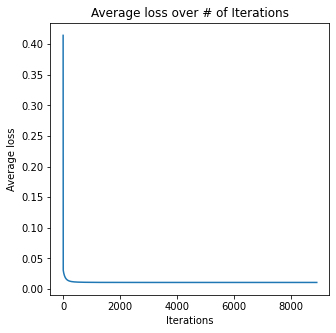

In [ ]:
model.plot_loss_history()

### P1.3

In [ ]:
test_samples = np.array([0.02, 80, 1.75, 0, 0.385, 6.2, 31.5, 9.1, 1, 241, 18.2, 341.6, 13])

prediction = model.calculate_house_price(test_samples, dataset.min, dataset.max)
print(f"prediction: {prediction}")

prediction: 19.93419914267853


### P2

In [ ]:
weight_closed_form = LR_with_closed_form(X, y)
print(weight_closed_form)

[ 0.48045039 -0.21355017  0.10315657  0.0124631   0.0597052  -0.1918794
  0.4418597   0.00149367 -0.36059247  0.15642529 -0.14362949 -0.19901831
  0.08206283 -0.42260541]


In [ ]:
print(abs(model.weight - weight_closed_form))

[1.25462509e-04 7.91640491e-06 1.23737155e-05 1.32564940e-05
 3.42107922e-08 3.29486373e-05 1.00874008e-04 2.69118292e-06
 6.47961179e-05 1.19965204e-05 4.89853052e-06 1.65353560e-05
 2.11922819e-05 5.26764808e-05]


### P3

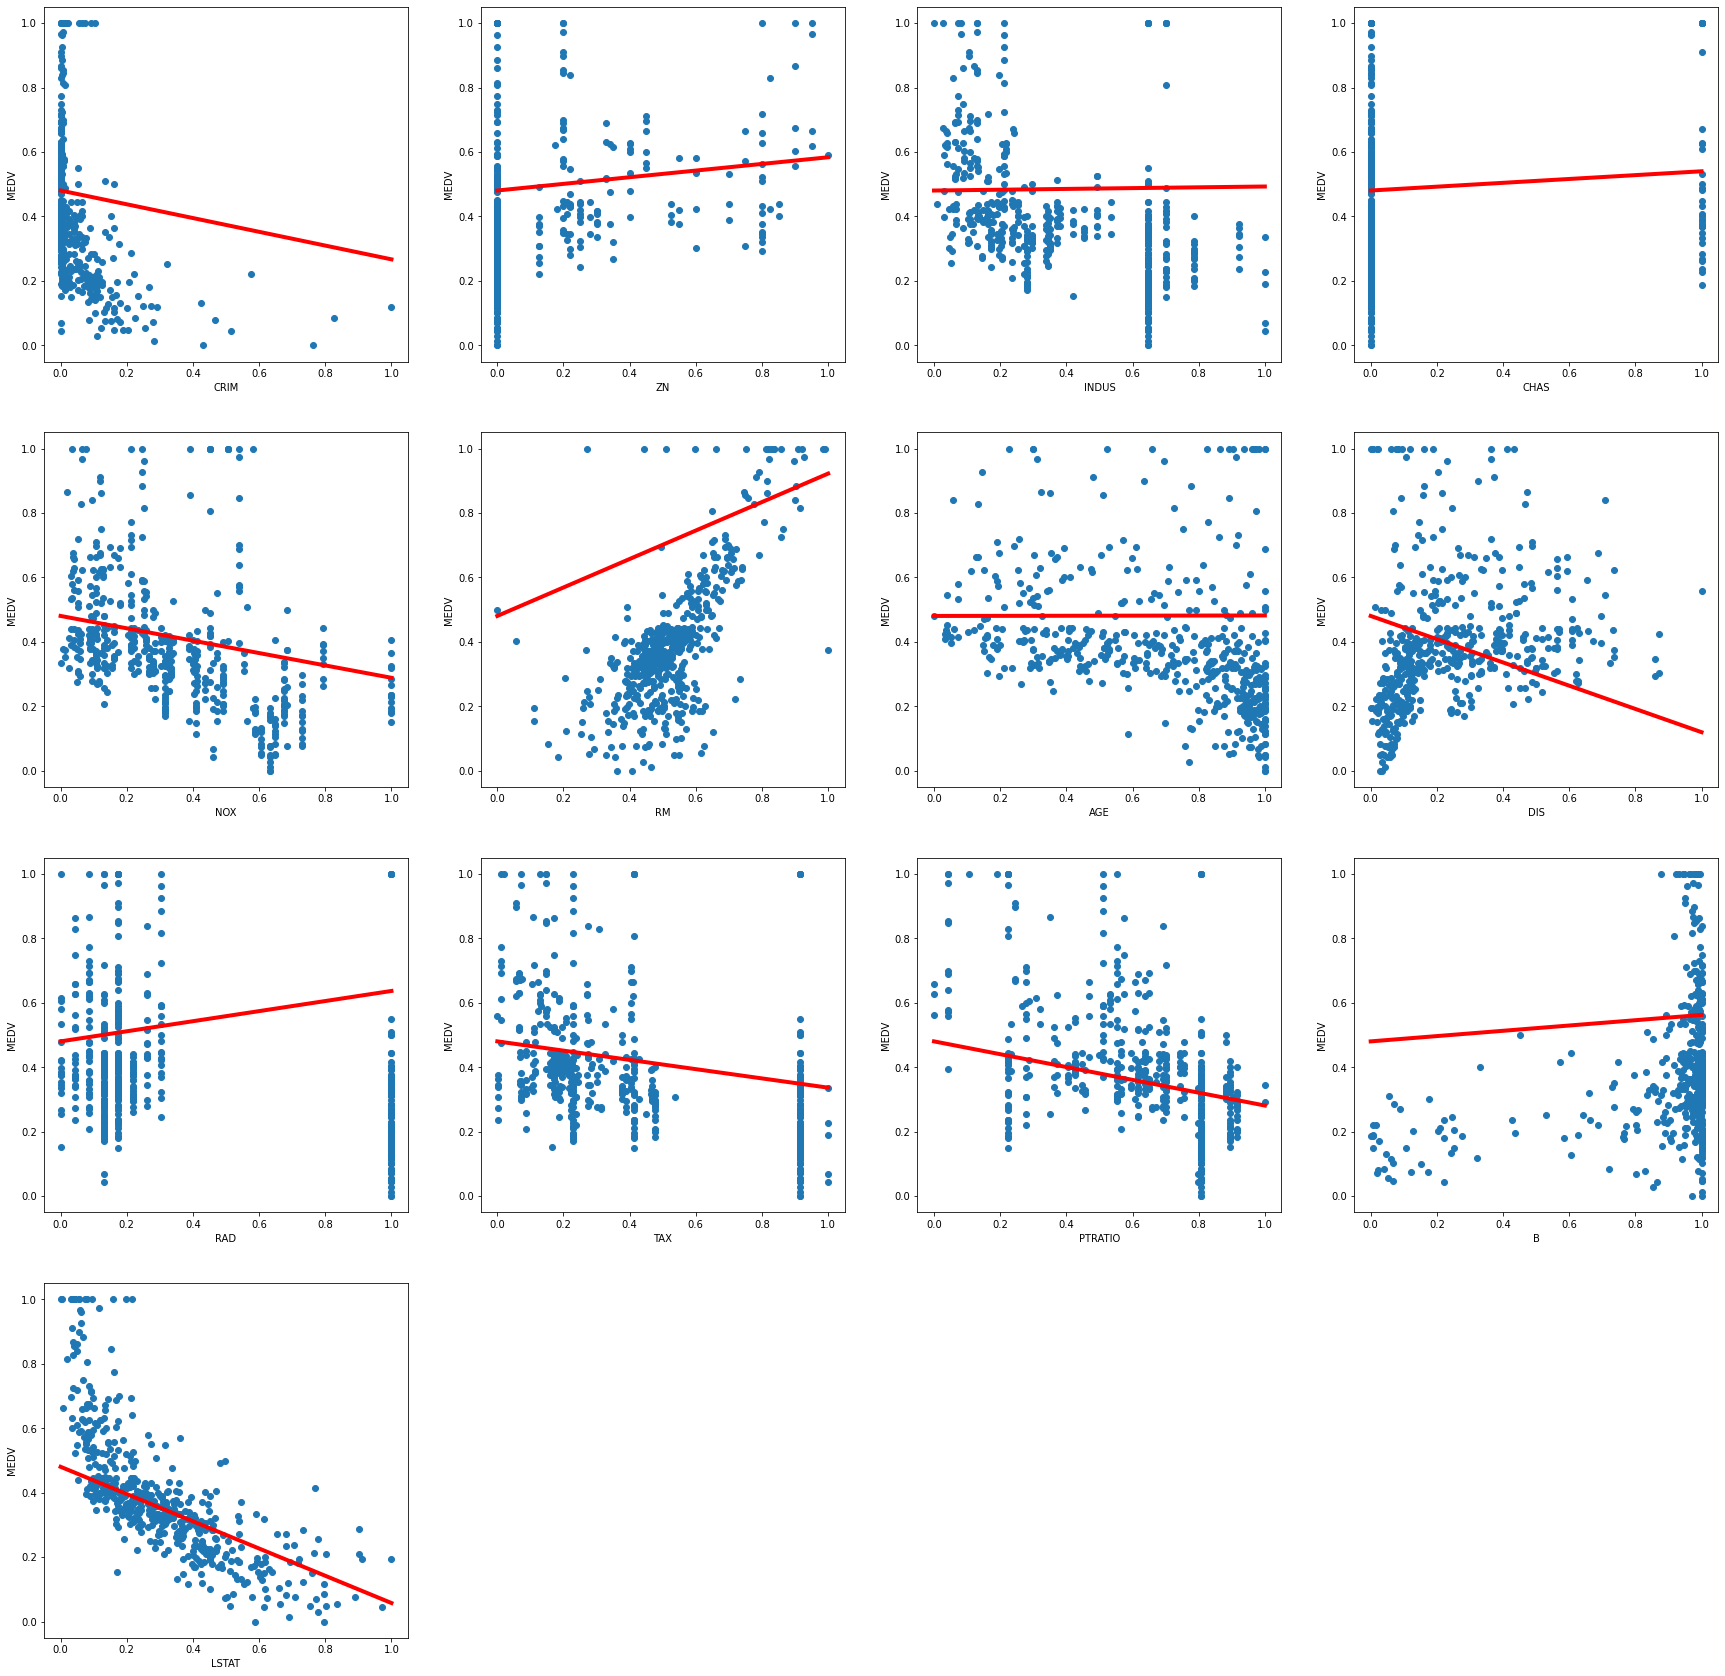

In [ ]:
visualize(model.weight, X, y, features)

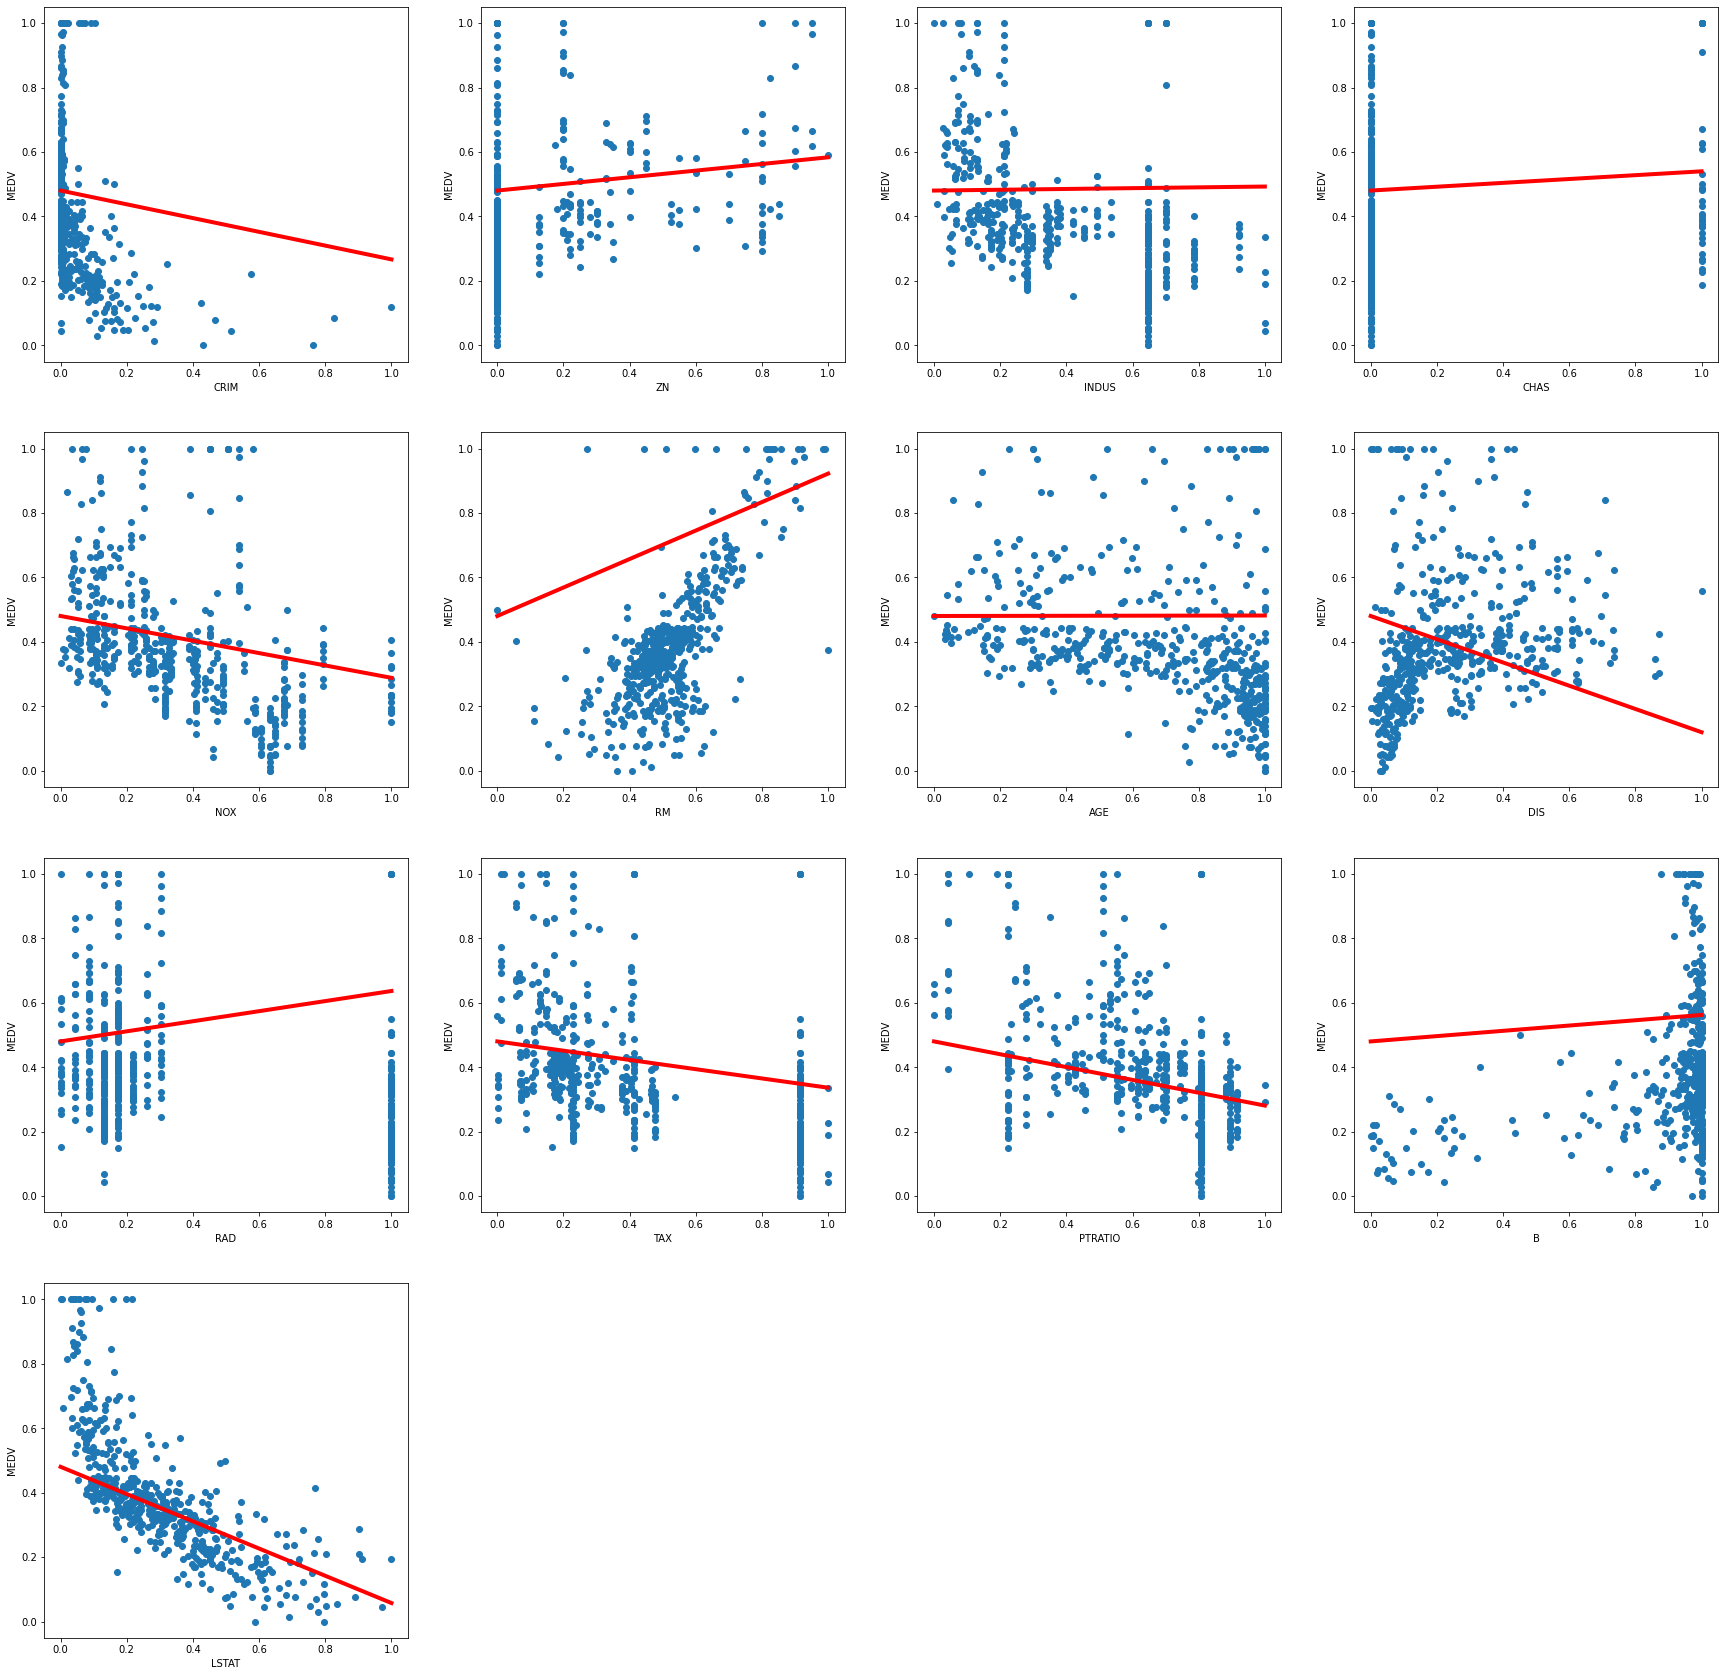

In [ ]:
visualize(weight_closed_form, X, y, features)


## Analysis and discussion (20 points)

Your answer must include.....

- Qualitative and quantitative comparisons for the results obtained from gradient descent and closed-form solution
- Qualitative results for
    - the number of features
    - influence of each feature on the prediction
- Effect of the normalization technique
    

For analysis and discussion, you can exploit all functions you've write or make your own functions (or scripts).

Qualitative and quantitative comparisons for the results obtained from gradient and closed-form solution
 
 : closed form은 정답이고, lr과 tau를 줄일 수록 iteration이 많이돌게 되고 / 그 오차가 줄어든다. 상호 보완이 필오ㅛ하다



Qualitative results for


*   the number of features
 - 직관적으로 생각해 보았을 때, features의 개수가 많다는 것은 우리가 traning할 수 있는 data가 많다는 것을 의미한다. 즉, 더 좋은 model이라고 할 수 있을 것이다. 
 -  아래의 features 수를 줄여 weight를 계산해본 결과, LSTAT를 집중적으로 보았을 때, features의 개수가 많아질 수록 weight가 줄어드는 것을 확인 할 수 있었다. 이는 features의 수가 더 많아질 수록 하나의 feature에 영향을 덜 받게되는 것을 의미하고, 이는 하나의 feature에 overfitting되는 것을 막을 수 있을 것이다. 
*   influence of each feature on the prediction
 - feature를 normalize하고 Linear Regression을 통해 각각의 feature가 target에 영향을 미치는 정도를 구할 수 있었다. model을 생성하기 전 집값에 영향을 줄 수 있는 feature에 대해서 우리는 '긍정적일 것이다' 또는 '부정적일 것이다'라고 추측해 볼 수 있다. 하지만 그것이 어느정도의 영향을 줄지는 알아낼 수 없다. 이때 우리는 Linear Regression을 통해 집값의 영향을 미치는 '정도'를 파악할 수 있었다. 
 - 예를 들면, CRIM과 LSTAT은 모두 부정적이라고 예측은 할 수 있지만, 처음에는 CRIM이 더 악영향을 줄 것이라 생각했다. 하지만 learning을 통해 model을 구현해 본 결과 LSTAT의 영향이 더 큰 것으로 결과가 도출되었다.
  - positive influence : ZN, INDUS, CHAS, RM, AGE, RAD, B
  - negative influence : CRIM, NOX, DIS, TAX, PTRATIO, LSTAT

Effect of the normaliztation technique

 : feature가 하나만 있을 때는 input에 따른 결과(slope)를 구하기 쉽다. 하지만 여러 features가 존재하는 경우, 특히 features의 단위(unit)이 다르다면 어떤 feature의 input으로는 결과를 예측하지 못한다. 따라서 features들의 단위를 맞춰줄 필요성이 있는데, 이를 normalization technique를 통해 단위를 맞춰주어 slope를 구할 수 있다.

An example code to analyze an effect for the number of features is as follows:

In [9]:
X, y = dataset.parse_data(features=['NOX', 'LSTAT'])
print(f"shape of X: {X.shape}, shape of y: {y.shape}")

model = LinearRegressor(lr=0.1, tau=1e-6, dim=X.shape[1])

shape of X: (506, 3), shape of y: (506,)


In [11]:
model.LR_with_gradient_descent(X, y)
model.weight

array([ 0.6187216 ,  0.01123922, -0.77312902])

In [12]:
X, y = dataset.parse_data(features=['NOX', 'PTRATIO', 'B', 'LSTAT'])
print(f"shape of X: {X.shape}, shape of y: {y.shape}")

model = LinearRegressor(lr=0.1, tau=1e-6, dim=X.shape[1])

shape of X: (506, 5), shape of y: (506,)


In [13]:
model.LR_with_gradient_descent(X, y)
model.weight

array([ 0.67609656,  0.01376173, -0.23604836,  0.05666872, -0.64750138])